## Софья Скобелева 
# Самостоятельная работа № 2



In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('data_demo.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## __Задание 1. (1 балл)__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но должно быть понятно, как вы это делали).

In [3]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

## __Задание 2. (1 балл)__

Замените все пропуски модами, медианами или средними (выберите сами, поясните выбор)

У нас есть пропуски в столбцах `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` и `BMI`. Все эти переменные количественные и дискретные, кроме переменной `BMI` - она количественная непрерывная.  
Посмотрим на распределения переменных

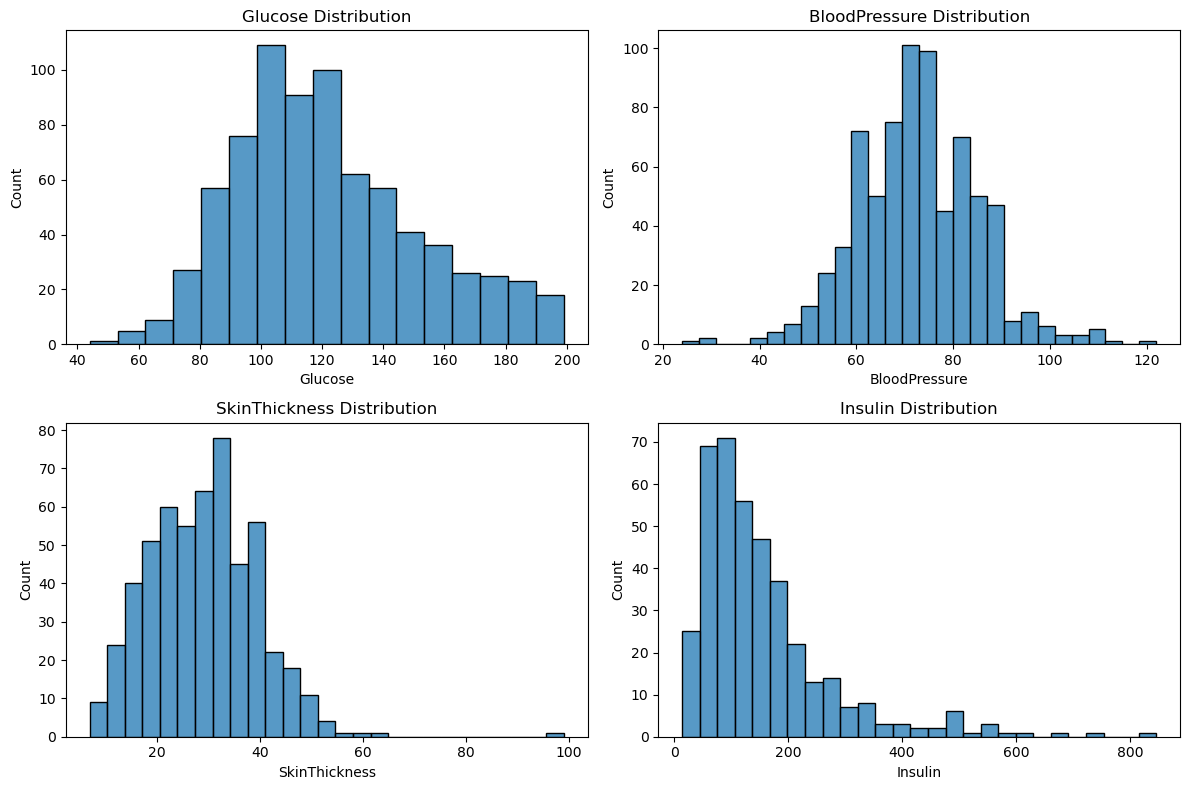

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data['Glucose'], kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Glucose Distribution')

sns.histplot(data['BloodPressure'], kde=False, ax=axes[0, 1])
axes[0, 1].set_title('BloodPressure Distribution')

sns.histplot(data['SkinThickness'], kde=False, ax=axes[1, 0])
axes[1, 0].set_title('SkinThickness Distribution')

sns.histplot(data['Insulin'], kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Insulin Distribution')


plt.tight_layout()
plt.show()

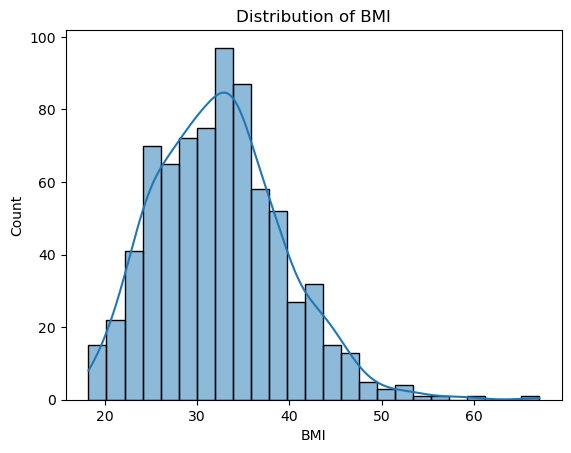

In [9]:
sns.histplot(data['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.show()

Есть распределения с перекосом вправо, лучше заменить пропуски медианой, так как медиана будет более устойчива к выбросам и перекосу в данных

In [15]:
variables = ["Glucose","BloodPressure","SkinThickness","Insulin", "BMI" ]

In [16]:
for x in variables:
    data[x] = data[x].fillna(data[x].median())

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

## __Задание 3. (1 балл)__

Будем предсказывать наличие или отсутствие диабета. Разделите данные на обучающую и тестовую выборку в соотношении 3 к 1.

In [40]:
X = data.drop('Class', axis=1)
y = data['Class']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## __Задание 4. (2 балла)__

 Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной. В данном случае наивной моделью может быть преположение "ни у кого нет диабета". Оцените качество модели.

In [77]:
import numpy as np

# Создаем наивную модель, предполагая, что ни у кого нет диабета
naive_prediction = np.zeros(X_test.shape[0])

# Оценим качество модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, naive_prediction)
print("Accuracy наивной модели:", accuracy)

Accuracy наивной модели: 0.65625


## __Задание 5. (3 балла)__

Постройте предсказательную модель с помощью логистической регрессии и случайного леса, а также KNN c 5 соседями. Сравните качество. Какая модель показала себя лучше?

### __Логистическая регрессия__

In [48]:
from sklearn import linear_model 
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train, y_train)

/Users/SSkobeleva/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [49]:
from sklearn import metrics
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       374
           1       0.62      0.44      0.51       202

    accuracy                           0.71       576
   macro avg       0.68      0.64      0.65       576
weighted avg       0.69      0.71      0.69       576

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       126
           1       0.56      0.47      0.51        66

    accuracy                           0.69       192
   macro avg       0.65      0.64      0.64       192
weighted avg       0.68      0.69      0.69       192



### __Случайный лес__

In [54]:
from sklearn import ensemble
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.80
Test: 0.56


/Users/SSkobeleva/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SSkobeleva/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SSkobeleva/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


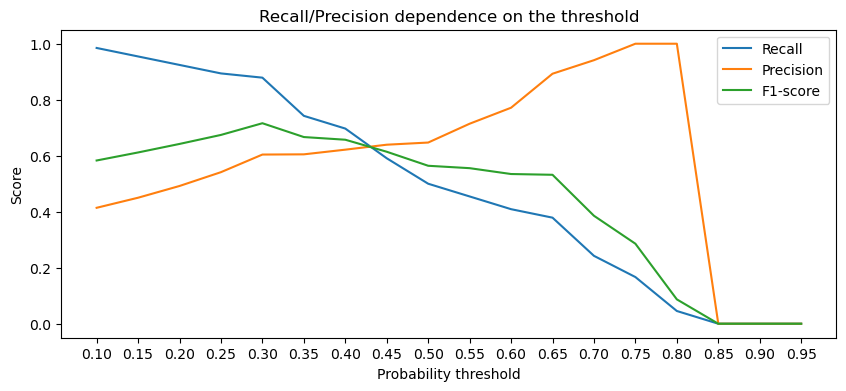

In [55]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [56]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.44
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       126
           1       0.65      0.64      0.64        66

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



### __KNN__

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 5)

# обучаем его по тренировочные выборке - просто забрал точки и запомнил их координаты
knn.fit(X_train, y_train)

# строим для тестовой выборки прогнозы - здесь уже начинает считать расстояния
y_pred_knn = knn.predict(X_test)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test) 

In [66]:
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       126
           1       0.63      0.58      0.60        66

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.74       192



По показателю __accuracy__ лучше оказалась модель случайного леса (accuracy = 0.76), но accuracy здесь отличается от accuracy других моделей не так сильно, на 2-7 единиц. И, как и ожидалось, accurancy всех моделей лучше по сравнению с accurancy наивной модели.  
Поскольку целью набора данных является диагностическое прогнозирование наличия диабета у пациента нам важно обратить внимание на метрику __recall__ (чем ближе значение recall к единице, тем меньше вероятность совершить ошибку II рода, важно когда нужно выявить как можно больше объектов класса 1). Наибольшее значение recall получилось также в модели случайного леса (recall = 0.64 для класса 1).   
По метрикам __precision__ и __f1-score__ модель случайного леса тоже выигрывает.   
На втором месте по качеству находится модель KNN, логистическая регрессия получилась наименее удачной. 
Класс 1 модели предсказывают хуже, чем класс 0. Но для класса 0 качество получилось хорошее.  
Таким образом, __налучшая модель в данном случае - модель случайного леса.__

## Задание 6 (2 балла)

 Примените шкалирование (MinMax, обучите его на обучающей выборке для признаков, затем примените к тестовой), снова постройте модели. Улучшилось ли качество?

In [51]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### __Логистическая регрессия__

In [50]:
from sklearn import linear_model 
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [52]:
from sklearn import metrics
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       374
           1       0.75      0.54      0.63       202

    accuracy                           0.77       576
   macro avg       0.77      0.72      0.73       576
weighted avg       0.77      0.77      0.76       576

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       126
           1       0.69      0.52      0.59        66

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.74       192



__Качество модели улучшилось:__ accuracy увеличилось на 6 единиц, метрики precision, recall, f1-score увеличились примерно на 5-10 единиц

### Случайный лес

В случае __случайного леса__ нормализация не изменит качества модели, потому что этот алгоритм не зависит от масштаба признаков (каждое дерево строится на подмножестве признаков, взвешивание признаков не влияет на результат)

### __KNN__

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 5)

# обучаем его по тренировочные выборке - просто забрал точки и запомнил их координаты
knn.fit(X_train_scaled, y_train)

# строим для тестовой выборки прогнозы - здесь уже начинает считать расстояния
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 

In [69]:
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       126
           1       0.68      0.62      0.65        66

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



__Качество модели улучшилось:__ accuracy выросло с 0.74 до 0.77, значения метрик precision, recall, f1-score тоже немного увеличились